   Data.Precipitation   Date.Full  Date.Month  Date.Week of  Date.Year  \
0                0.00  2016-01-03           1             3       2016   
1                0.00  2016-01-03           1             3       2016   
2                0.16  2016-01-03           1             3       2016   
3                0.00  2016-01-03           1             3       2016   
4                0.01  2016-01-03           1             3       2016   

  Station.City Station.Code Station.Location Station.State  \
0   Birmingham          BHM   Birmingham, AL       Alabama   
1   Huntsville          HSV   Huntsville, AL       Alabama   
2       Mobile          MOB       Mobile, AL       Alabama   
3   Montgomery          MGM   Montgomery, AL       Alabama   
4    Anchorage          ANC    Anchorage, AK        Alaska   

   Data.Temperature.Avg Temp  Data.Temperature.Max Temp  \
0                         39                         46   
1                         39                         47   
2    

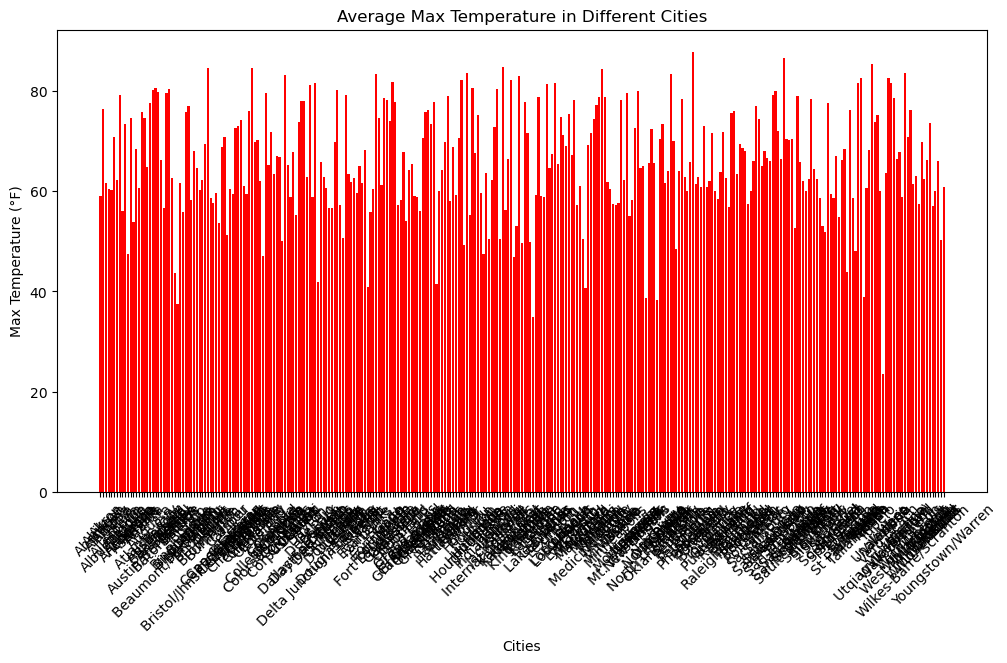

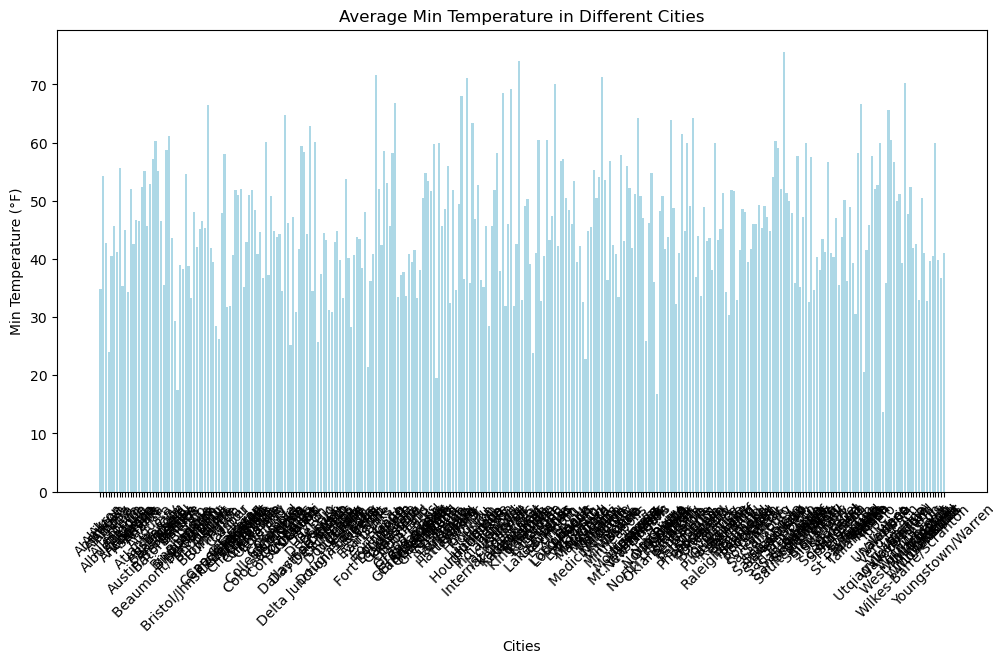

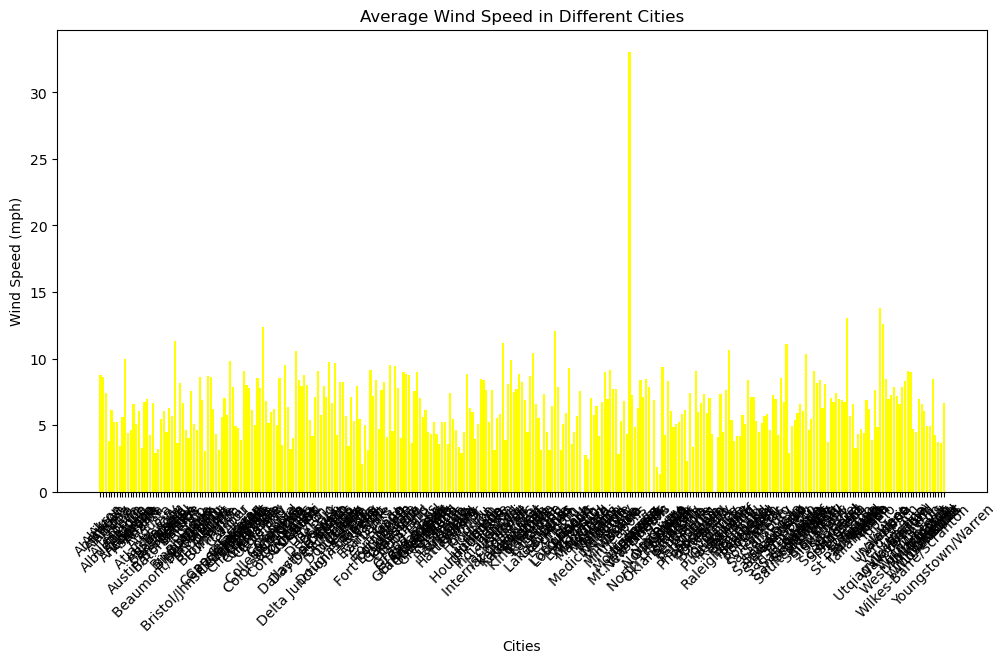

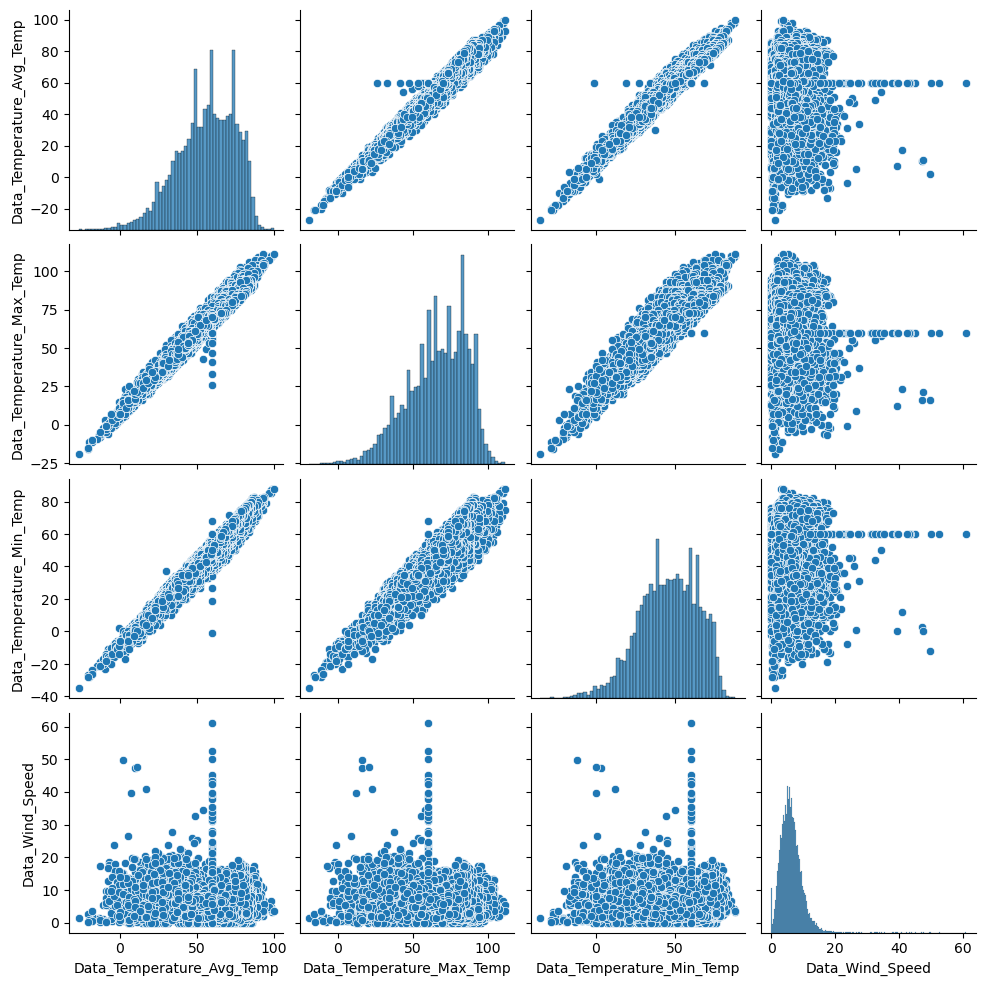

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the weather data from CSV file
weather_data = pd.read_csv('weather.csv')

# Display the first few rows of the data
print(weather_data.head())

# Cleaning the column names for easier access
weather_data.columns = weather_data.columns.str.replace(' ', '_').str.replace('.', '_')

# Summary of the data
print(weather_data.describe())
print(weather_data.info())
print("Duplicated rows:", weather_data.duplicated().sum())

# Group by city and calculate average max and min temperatures
average_max_temp = weather_data.groupby('Station_City')['Data_Temperature_Max_Temp'].mean()
average_min_temp = weather_data.groupby('Station_City')['Data_Temperature_Min_Temp'].mean()

# Bar plot for Maximum Temperature
plt.figure(figsize=(12, 6))
plt.bar(average_max_temp.index, average_max_temp, color='red')
plt.title('Average Max Temperature in Different Cities')
plt.xlabel('Cities')
plt.ylabel('Max Temperature (°F)')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Minimum Temperature
plt.figure(figsize=(12, 6))
plt.bar(average_min_temp.index, average_min_temp, color='lightblue')
plt.title('Average Min Temperature in Different Cities')
plt.xlabel('Cities')
plt.ylabel('Min Temperature (°F)')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Wind Speed
average_wind_speed = weather_data.groupby('Station_City')['Data_Wind_Speed'].mean()

plt.figure(figsize=(12, 6))
plt.bar(average_wind_speed.index, average_wind_speed, color='yellow')
plt.title('Average Wind Speed in Different Cities')
plt.xlabel('Cities')
plt.ylabel('Wind Speed (mph)')
plt.xticks(rotation=45)
plt.show()

# Pairplot for overall relationships
sns.pairplot(weather_data, vars=['Data_Temperature_Avg_Temp', 'Data_Temperature_Max_Temp', 'Data_Temperature_Min_Temp', 'Data_Wind_Speed'])
plt.show()
